In [33]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
import pei.laborfunctions as lf
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [2]:
# Load labor capacity data
ds_mean = xr.open_dataset('../data/processed/CESM2/labor_mean_ens1-5.nc').rename({'__xarray_dataarray_variable__':'capacity'}).isel(time=slice(0,-1))

In [3]:
# Population data
ds_pop = xr.open_dataset('../data/processed/CESM2/population_regrid_cesm2.nc')['population']
ds_pop = ds_pop.where(np.isfinite(ds_pop),0)
ds_pop = ds_pop.rename({'latitude':'lat','longitude':'lon'})

# Overall Trends

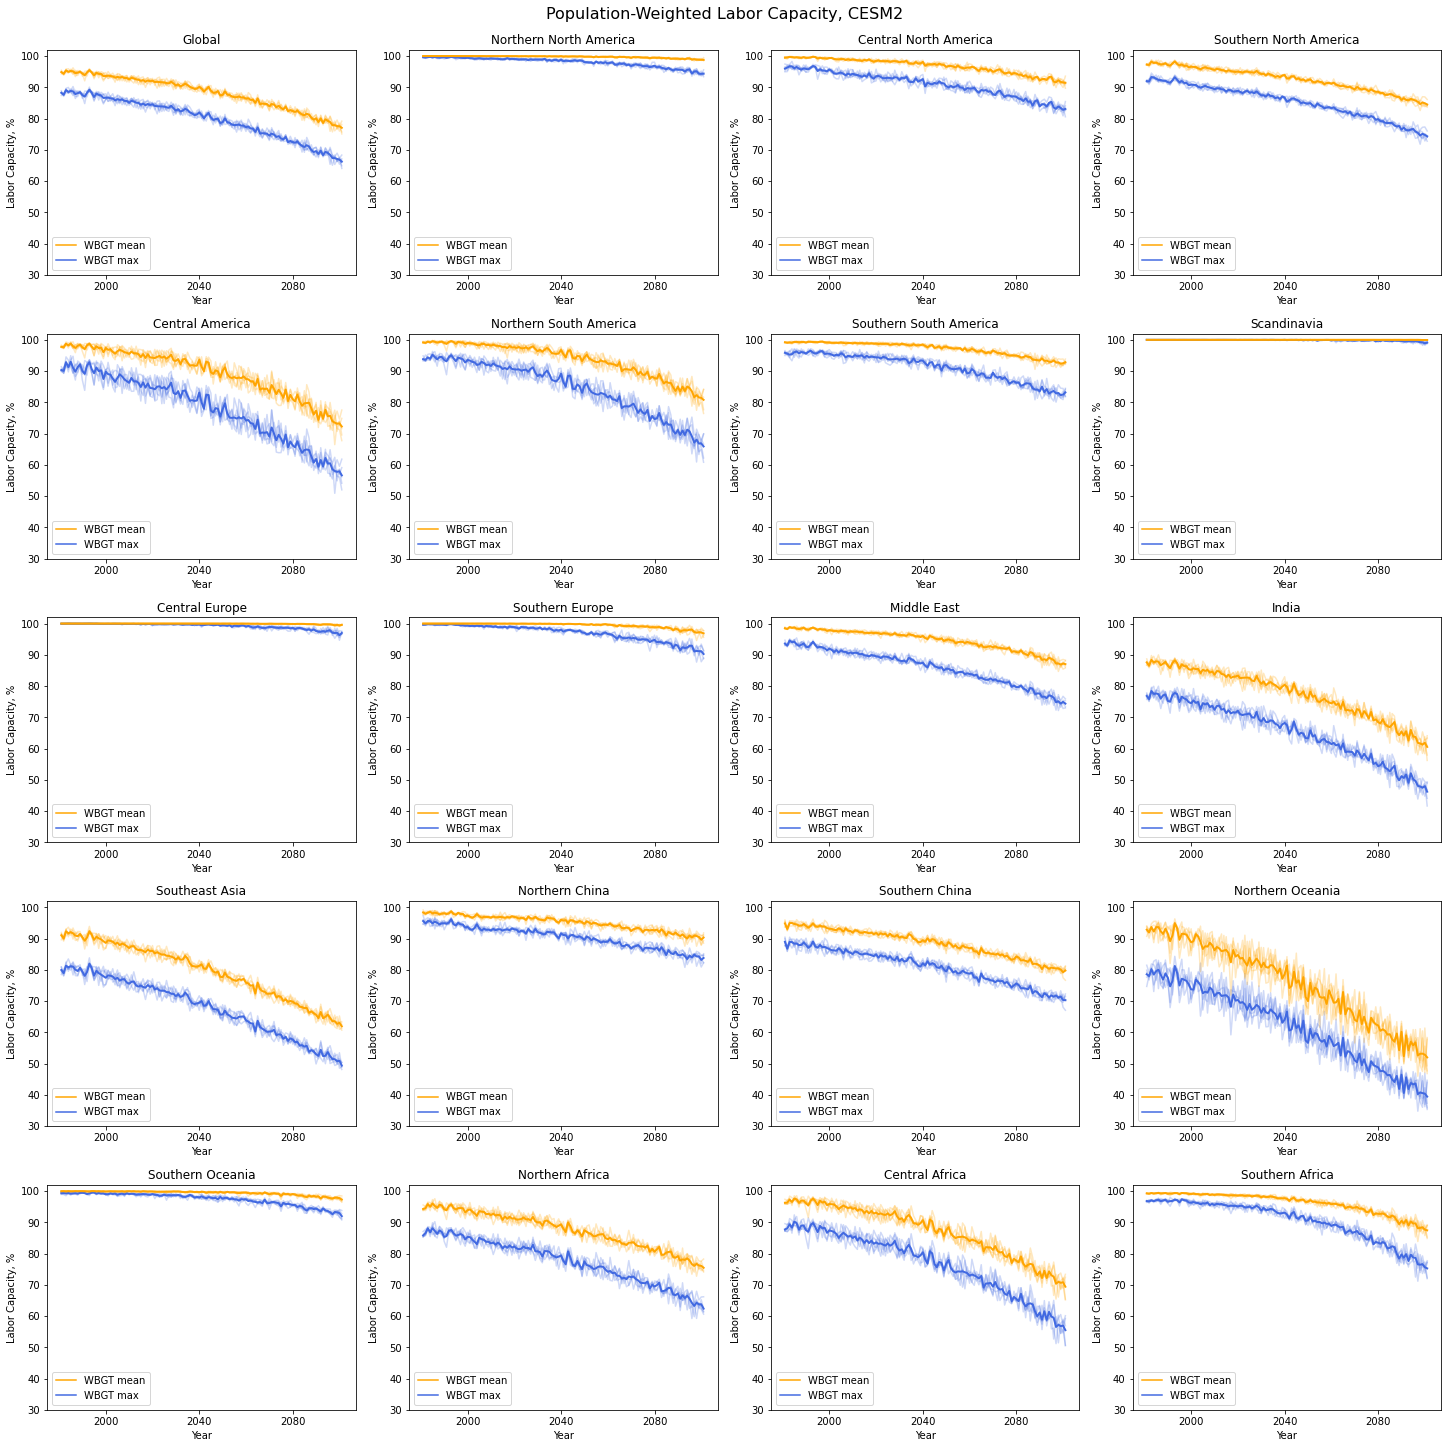

In [35]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    lf.capacity(ds_max['capacity'],ds_pop,region,'CESM2',ax)
    lf.capacity(ds_mean['capacity'],ds_pop,region,'CESM2',ax,'orange')
    ax.set_ylim([30,102])
    blue_line = mlines.Line2D([], [], color='royalblue', label='WBGT max')
    orange_line = mlines.Line2D([], [], color='orange', label='WBGT mean')
    ax.legend(handles=[orange_line,blue_line],loc='lower left');
    
fig.suptitle('Population-Weighted Labor Capacity, CESM2',fontsize=16);
fig.savefig('cesm2_max_mean_regional_capacities.png')

# Daily Mean

## Spatial Map

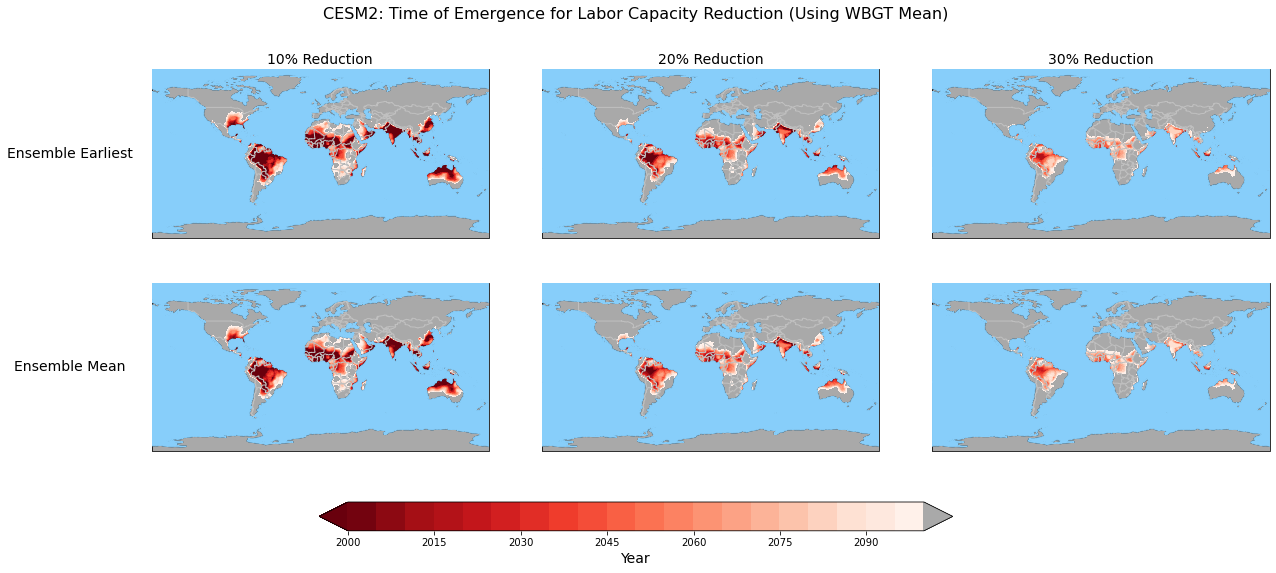

In [56]:
lf.spatial_toe(ds_mean['capacity'],'CESM2: Time of Emergence for Labor Capacity Reduction (Using WBGT Mean)',start_year=1980)
plt.savefig('cesm2_toe_mean_map.png')

## Spatial Map (Diff)

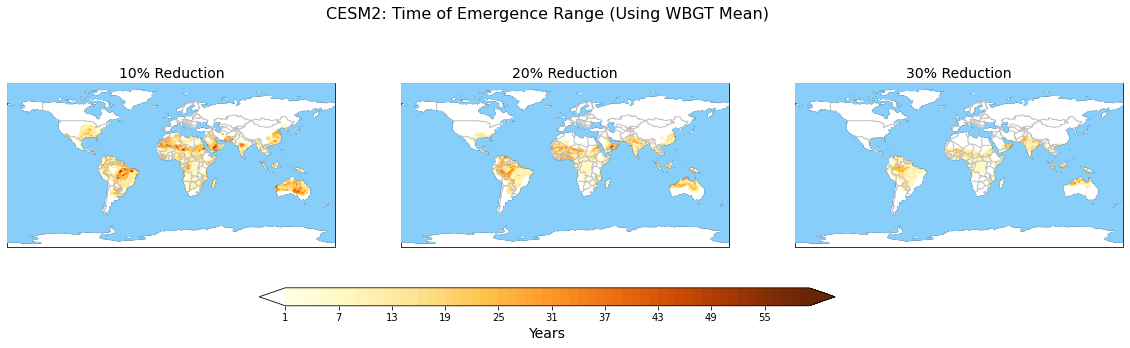

In [68]:
lf.spatial_toe_diff(ds_mean['capacity'],'CESM2: Time of Emergence Range (Using WBGT Mean)',start_year=1980)
plt.savefig('cesm2_toe_range_mean.png')

## Bar Chart: Average ToE

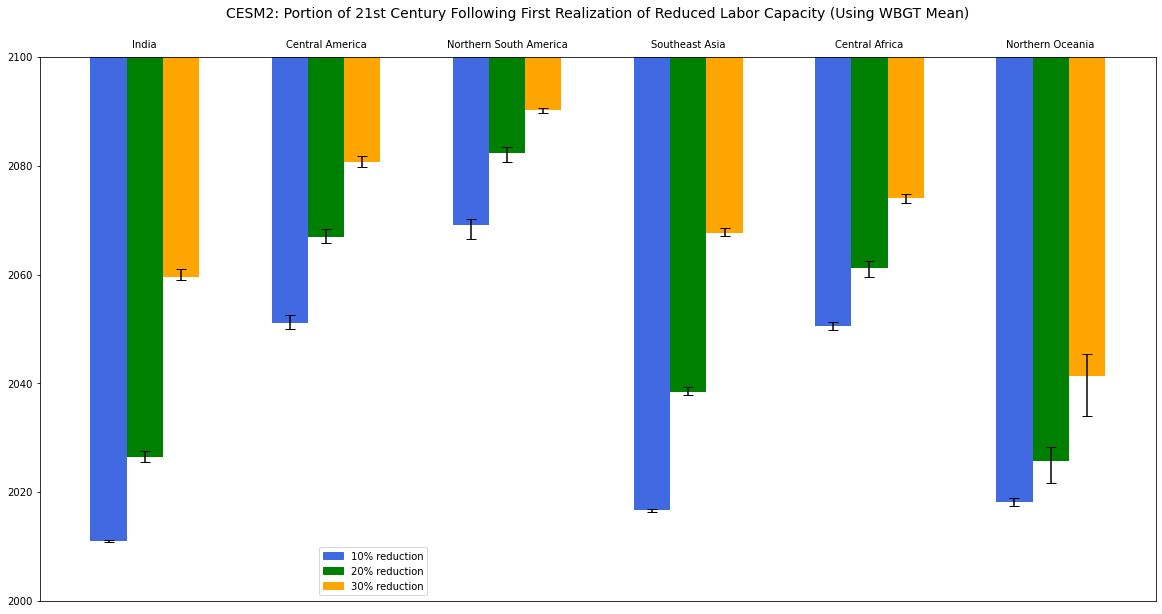

In [51]:
lf.average_toe_bar(ds_mean['capacity'],ds_pop,'CESM2','CESM2: Portion of 21st Century Following First Realization of Reduced Labor Capacity (Using WBGT Mean)\n',length=120)
plt.savefig('cesm2_toe_mean_bar.png')

## Bar Chart: ToE of Average

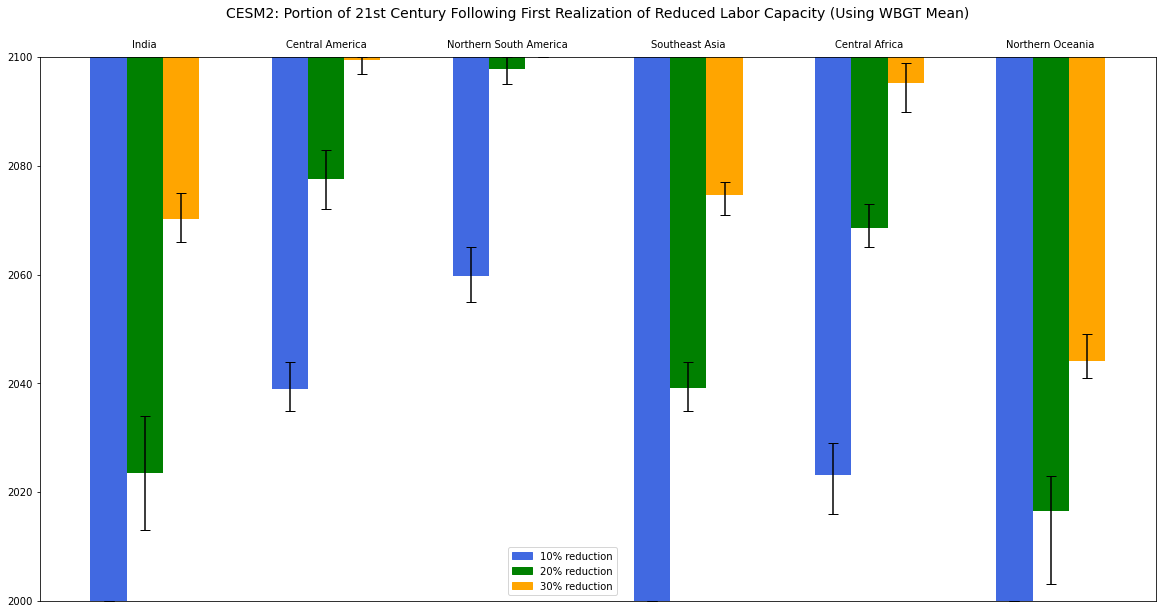

In [52]:
lf.toe_bar(ds_mean,ds_pop,'CESM2','CESM2: Portion of 21st Century Following First Realization of Reduced Labor Capacity (Using WBGT Mean)\n',length=120)
plt.savefig('cesm2_toe_mean_bar2.png')

# Daily Max

In [7]:
# Load labor capacity data
ds_max = xr.open_dataset('../data/processed/CESM2/labor_max_ens1-5.nc').rename({'__xarray_dataarray_variable__':'capacity'}).isel(time=slice(0,-1))

## Spatial Map

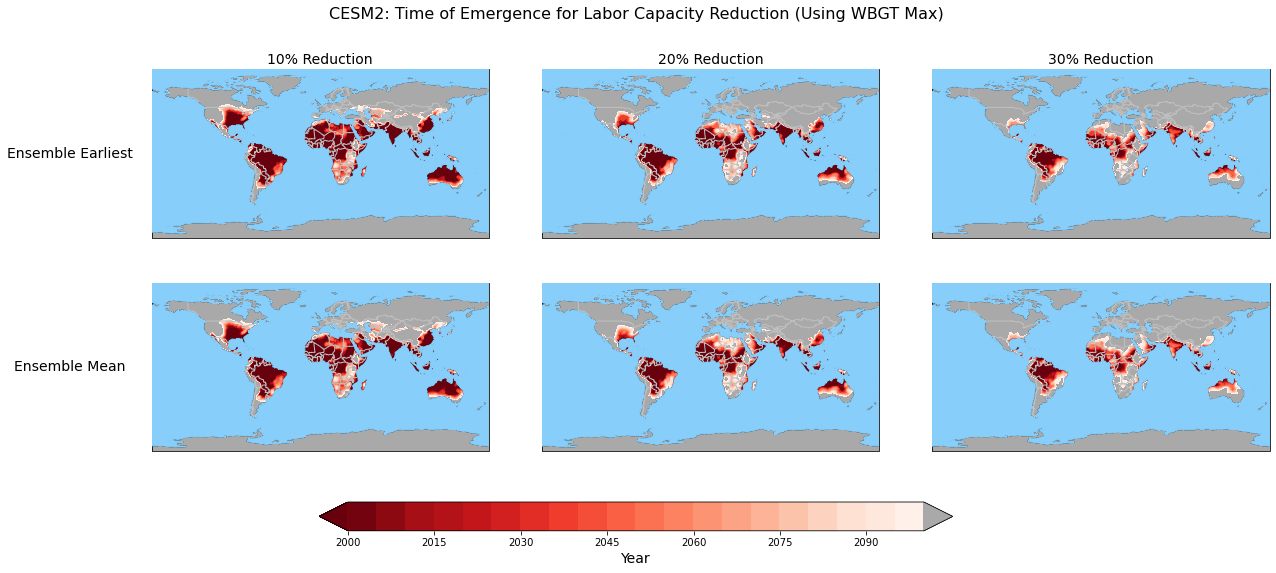

In [59]:
lf.spatial_toe(ds_max['capacity'],'CESM2: Time of Emergence for Labor Capacity Reduction (Using WBGT Max)',start_year=1980)
plt.savefig('cesm2_toe_max_map.png')

## Spatial Map (Diff)

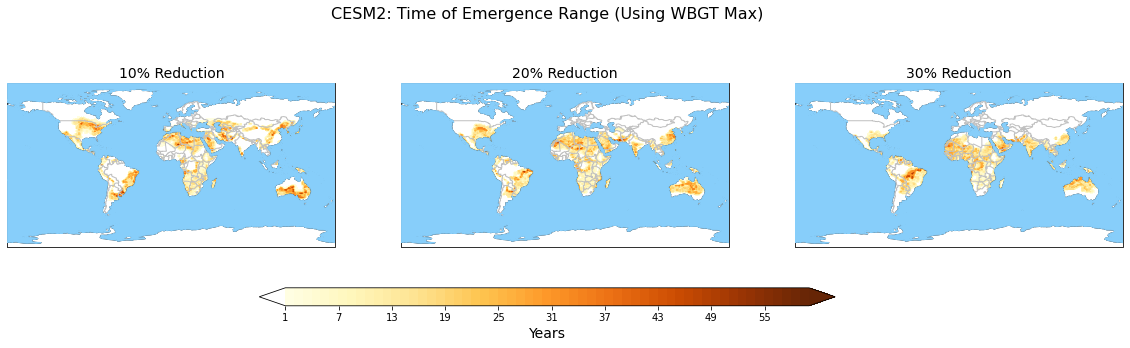

In [69]:
lf.spatial_toe_diff(ds_max['capacity'],'CESM2: Time of Emergence Range (Using WBGT Max)',start_year=1980)
plt.savefig('cesm2_toe_range_max.png')

## Bar Chart: Average ToE

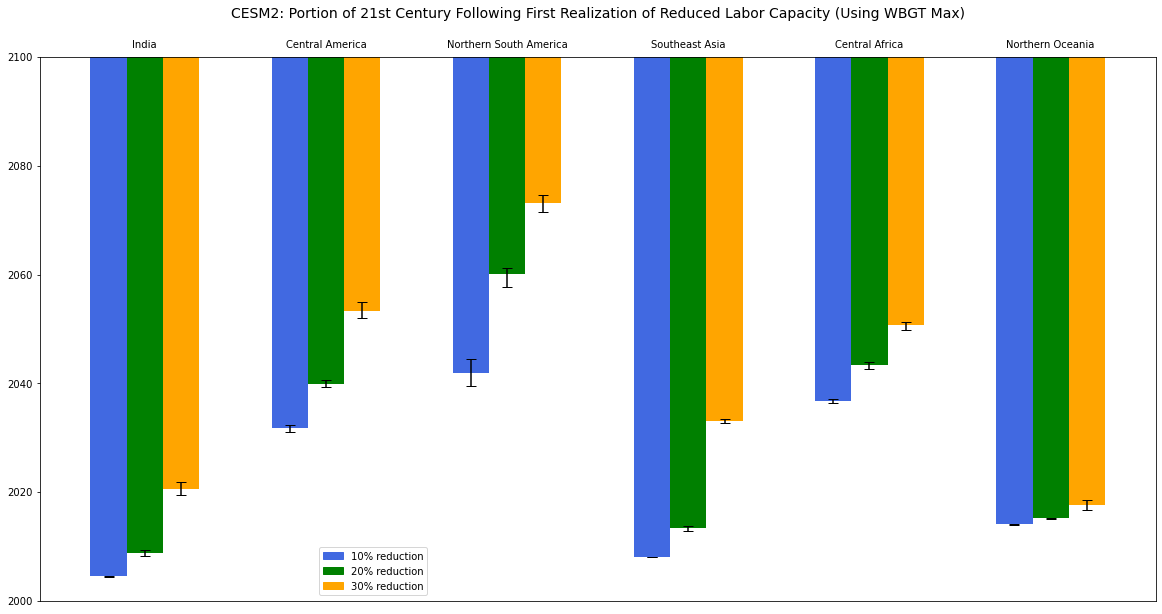

In [53]:
lf.average_toe_bar(ds_max['capacity'],ds_pop,'CESM2','CESM2: Portion of 21st Century Following First Realization of Reduced Labor Capacity (Using WBGT Max)\n',length=120)
plt.savefig('cesm2_toe_max_bar.png')

## Bar Chart: ToE of Average

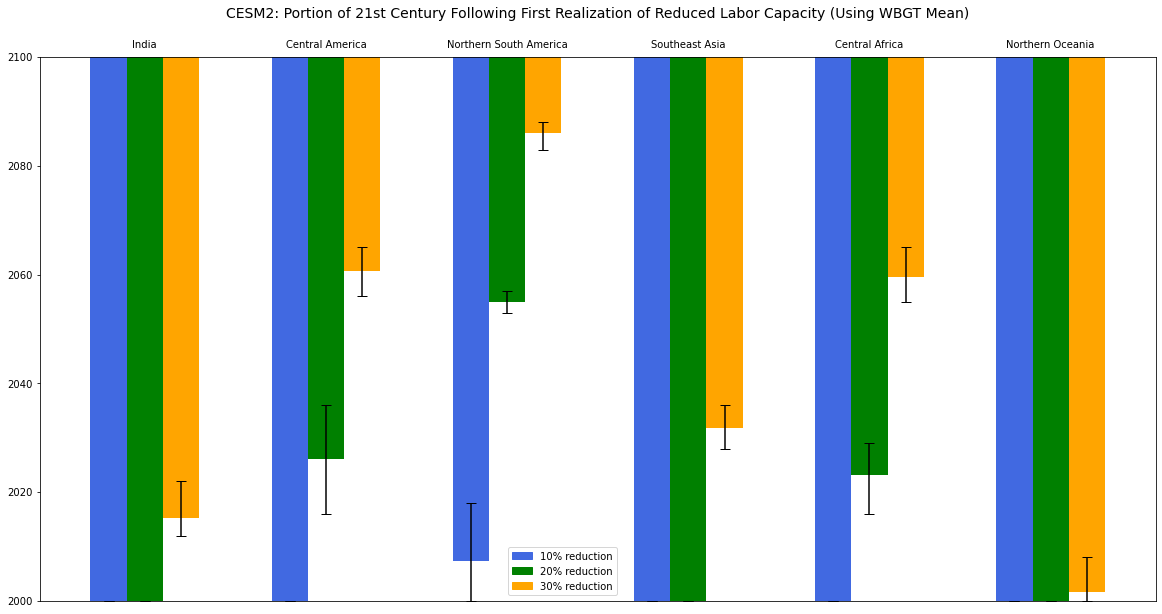

In [54]:
lf.toe_bar(ds_max,ds_pop,'CESM2','CESM2: Portion of 21st Century Following First Realization of Reduced Labor Capacity (Using WBGT Mean)\n',length=120)
plt.savefig('cesm2_toe_max_bar2.png')

# Area Emerged

In [70]:
# Load area data
land_area = xr.open_dataset('../data/processed/CESM2/cesm2.land_area')
land_mask = np.isfinite(land_area)
# Replace NaN with 0 
land_area_adj = land_area.where(land_mask,0).rename({'__xarray_dataarray_variable__':'land_area'})
land_area_adj = land_area_adj['land_area'].isel(ensemble=0)

## WBGT Mean

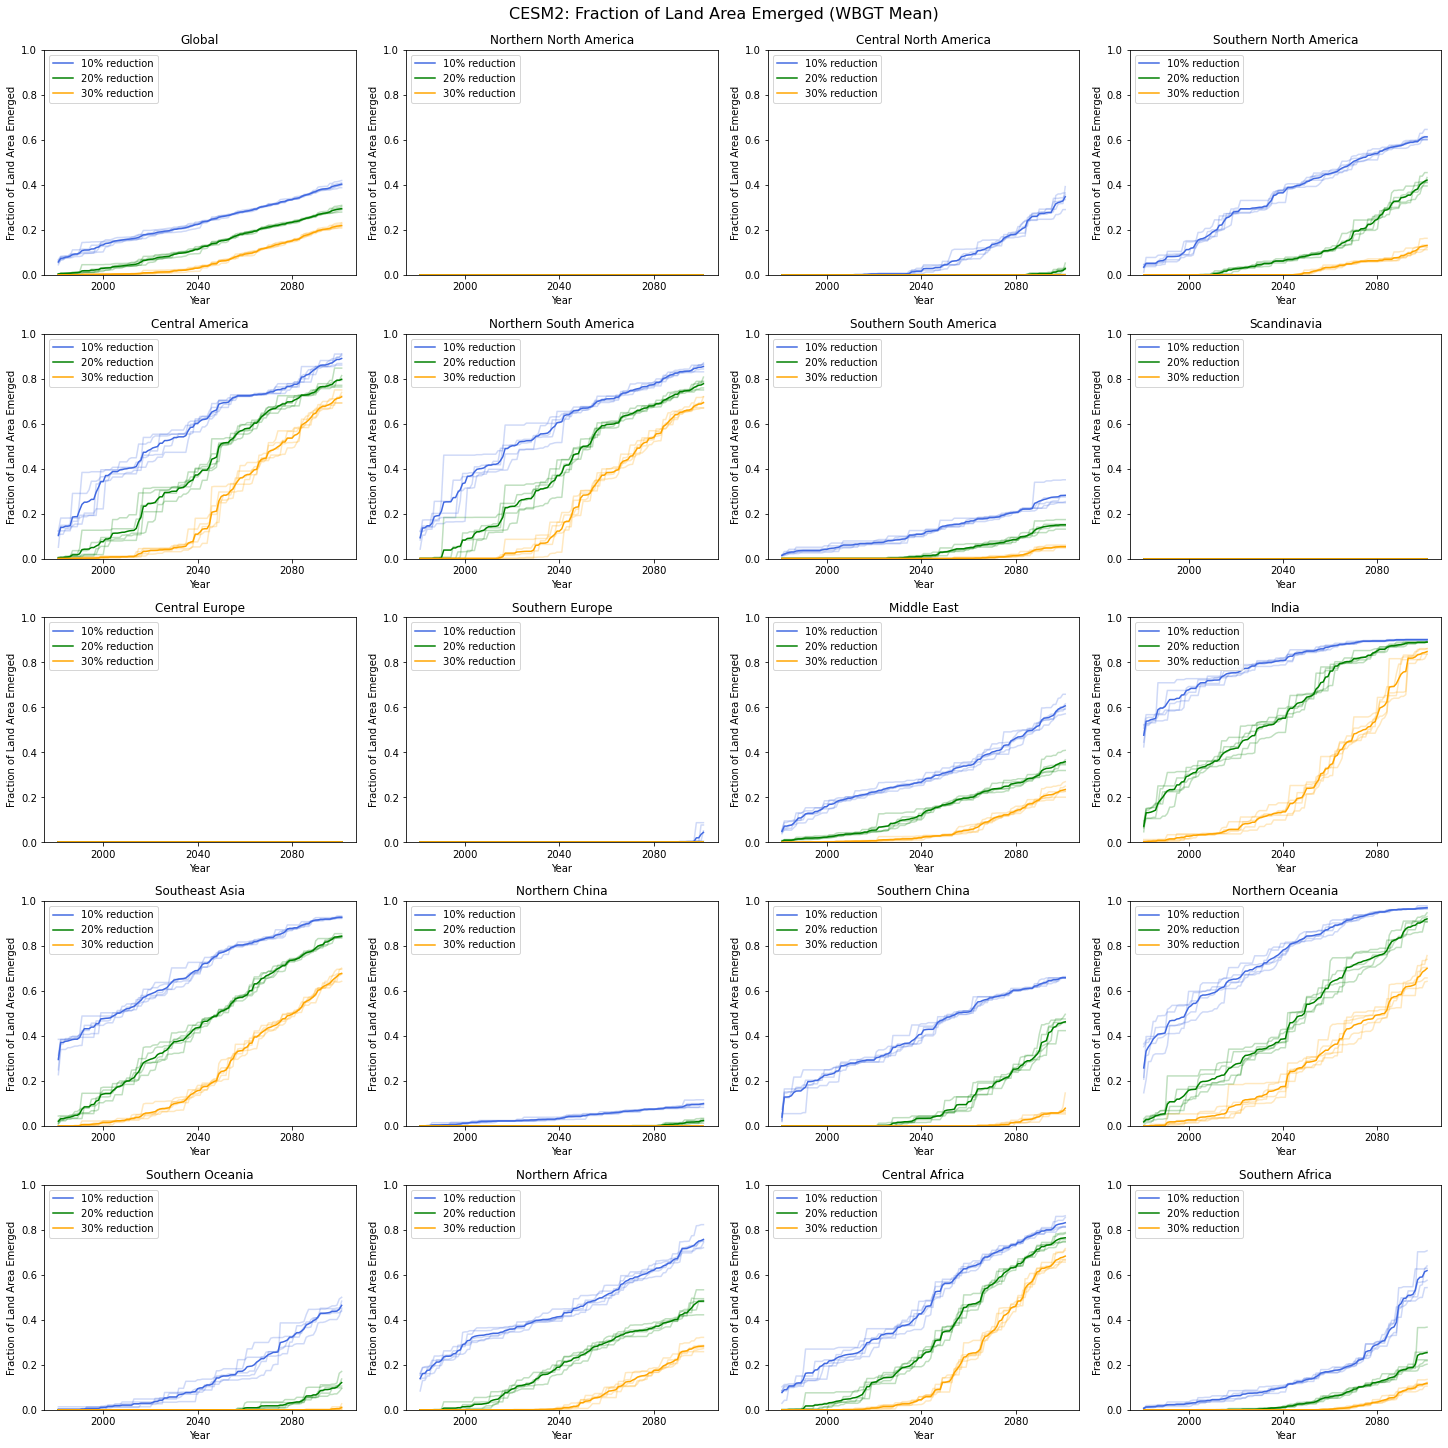

In [126]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    # Get data for region
    ds_region = lf.slice_region(ds_mean['capacity'],region,'CESM2')
    ds_area = lf.slice_region(land_area_adj,region,'CESM2')
    
    lf.area_emerge_plot(ds_region,ds_area,region,'Fraction of Land Area Emerged',ax,start_year=1980)
    
fig.suptitle('CESM2: Fraction of Land Area Emerged (WBGT Mean)',fontsize=16);
plt.savefig('cesm2_mean_frac_area_emerge.png')

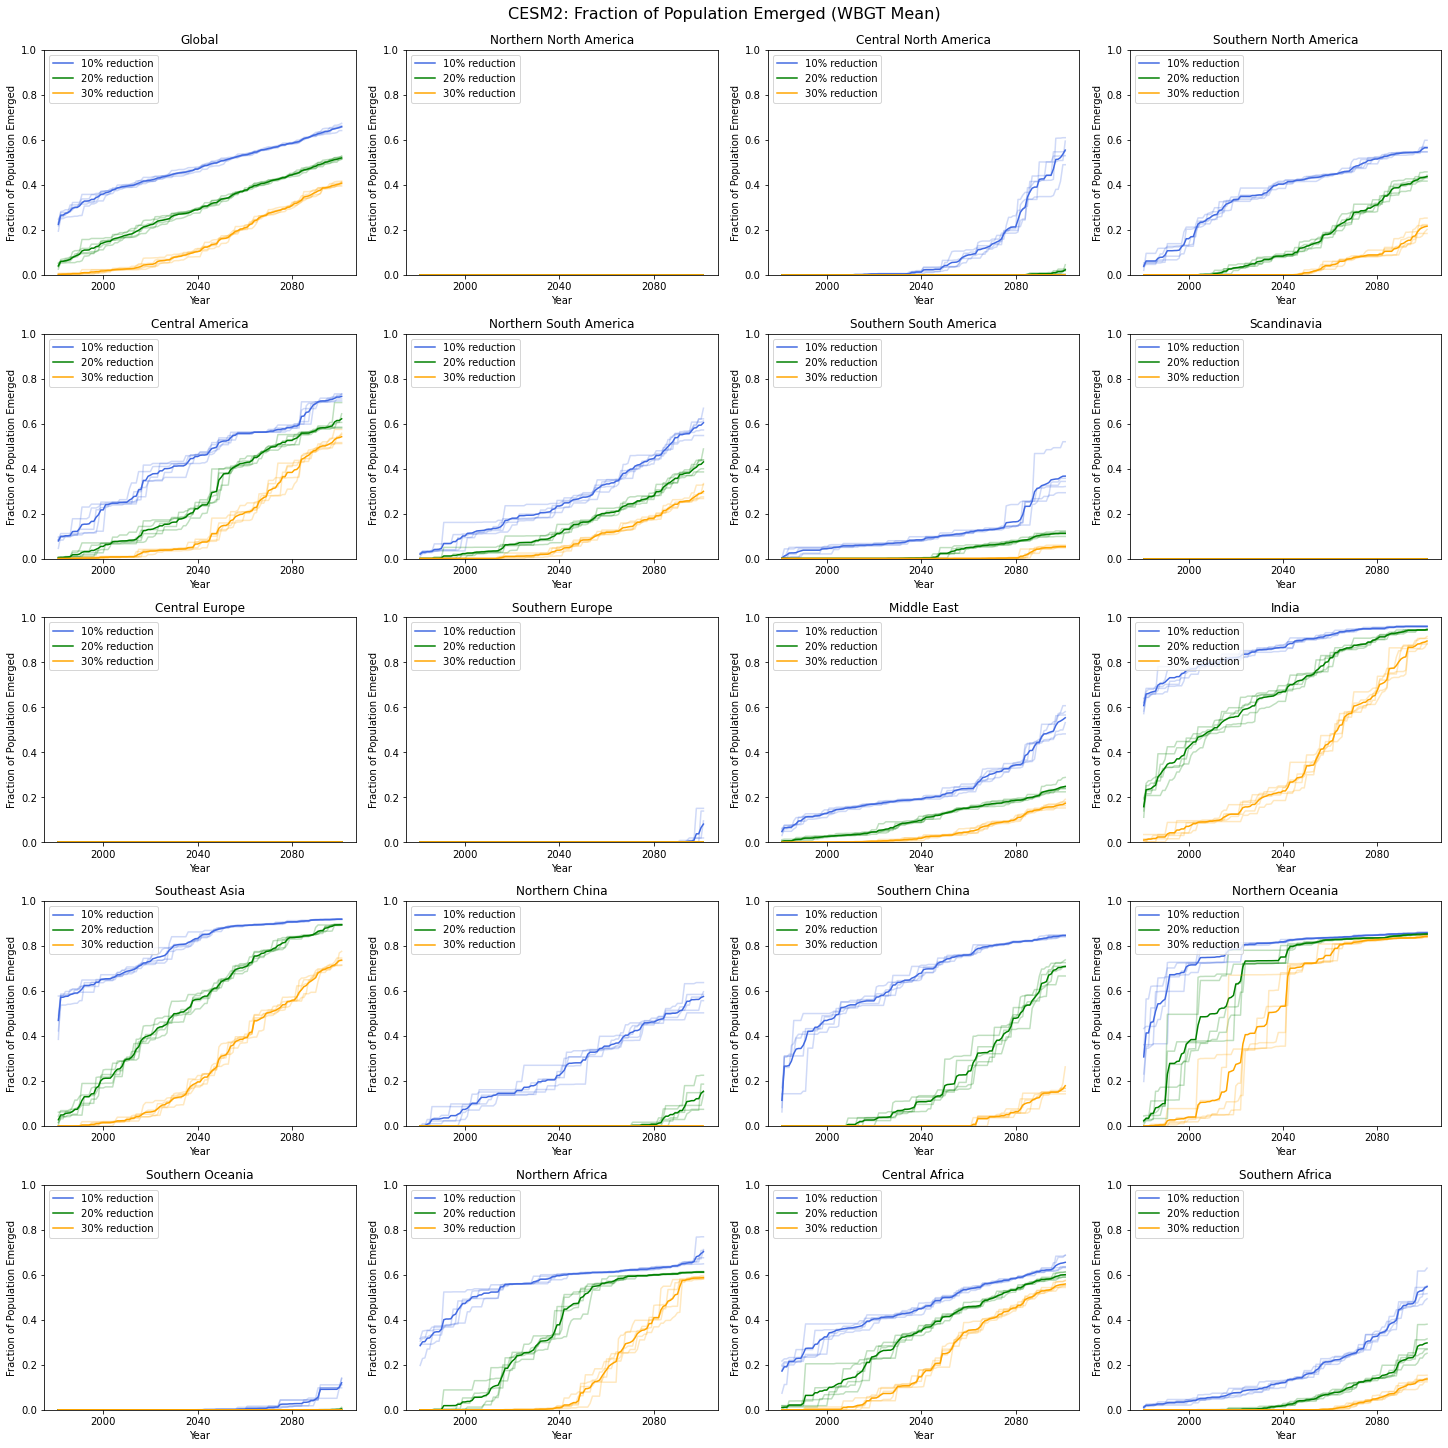

In [127]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    # Get data for region
    ds_region = lf.slice_region(ds_mean['capacity'],region,'CESM2')
    pop_region = lf.slice_region(ds_pop,region,'CESM2')
    
    lf.area_emerge_plot(ds_region,pop_region,region,'Fraction of Population Emerged',ax,start_year=1980)
    
fig.suptitle('CESM2: Fraction of Population Emerged (WBGT Mean)',fontsize=16);
plt.savefig('cesm2_mean_frac_pop_emerge.png')

## WBGT Max

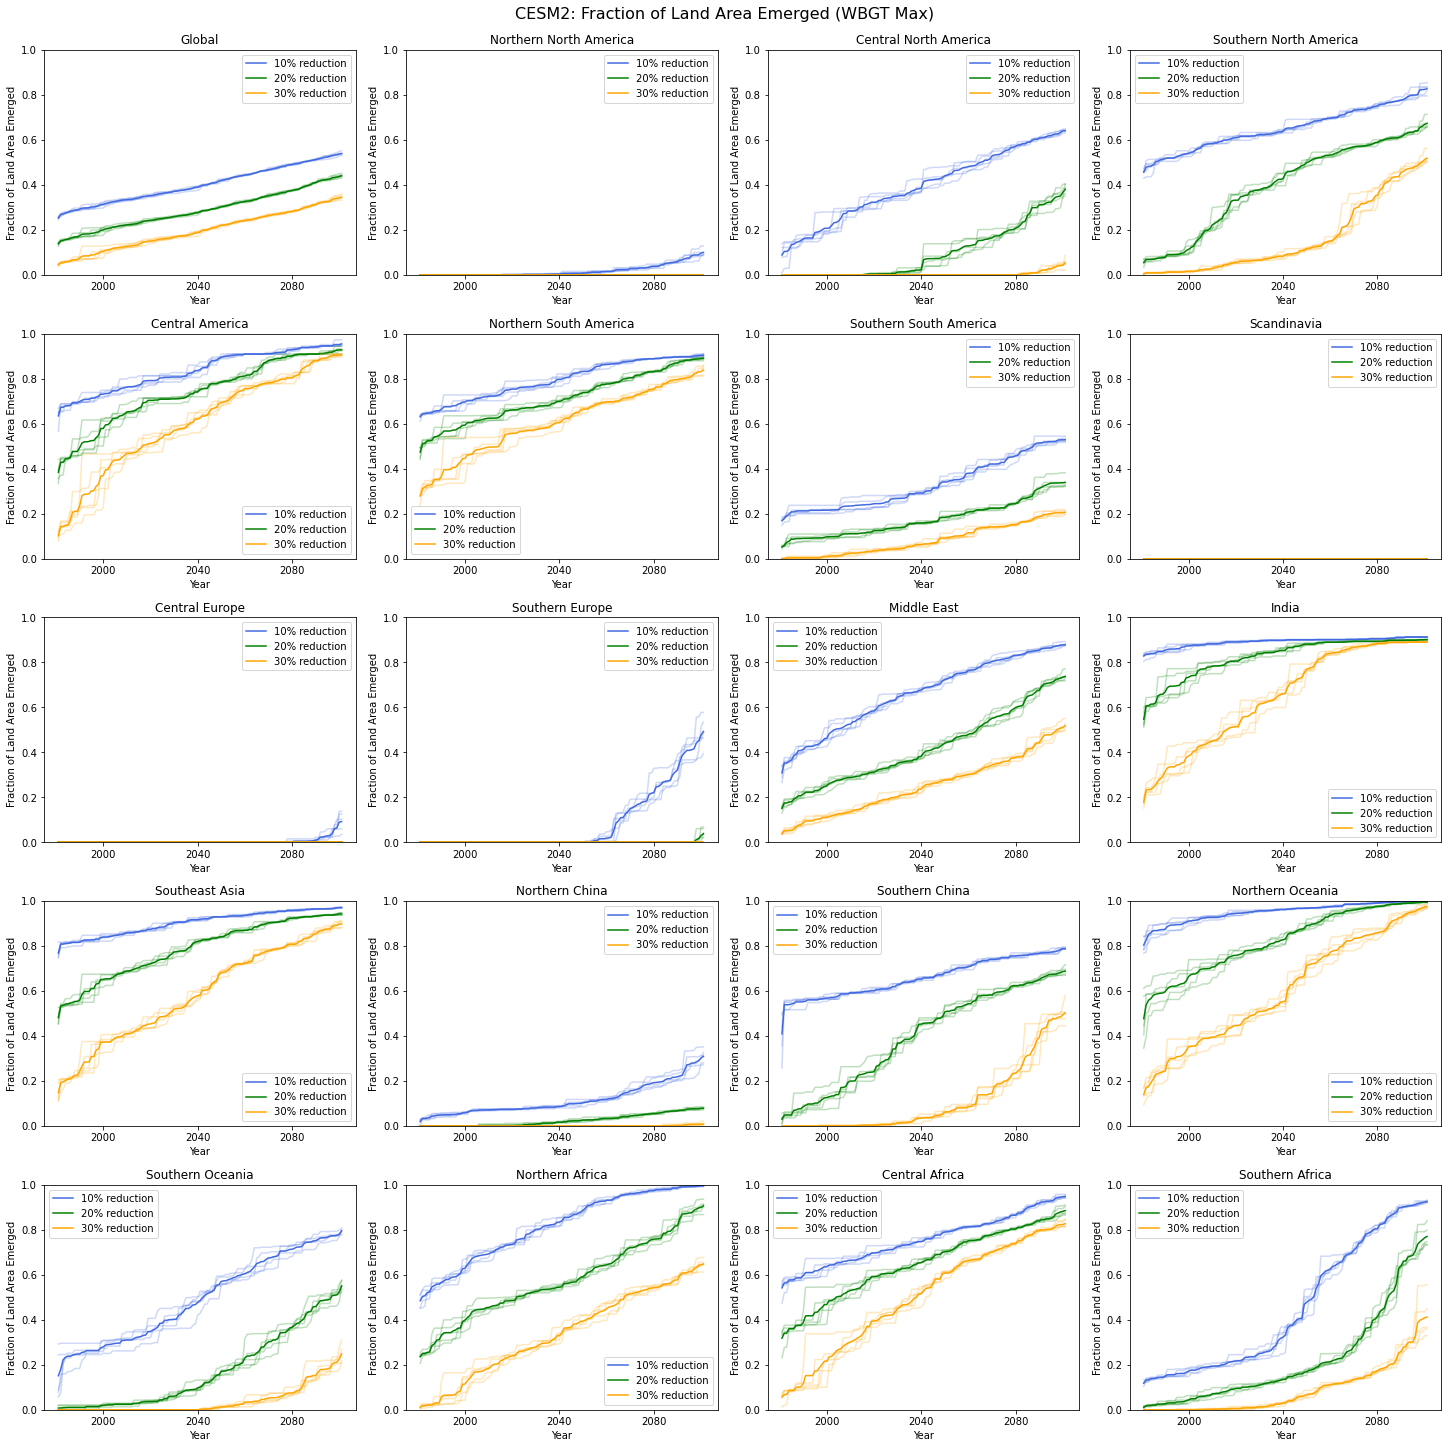

In [129]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    # Get data for region
    ds_region = lf.slice_region(ds_max['capacity'],region,'CESM2')
    ds_area = lf.slice_region(land_area_adj,region,'CESM2')
    
    lf.area_emerge_plot(ds_region,ds_area,region,'Fraction of Land Area Emerged',ax,start_year=1980)
    
fig.suptitle('CESM2: Fraction of Land Area Emerged (WBGT Max)',fontsize=16);
plt.savefig('cesm2_max_frac_area_emerge.png')

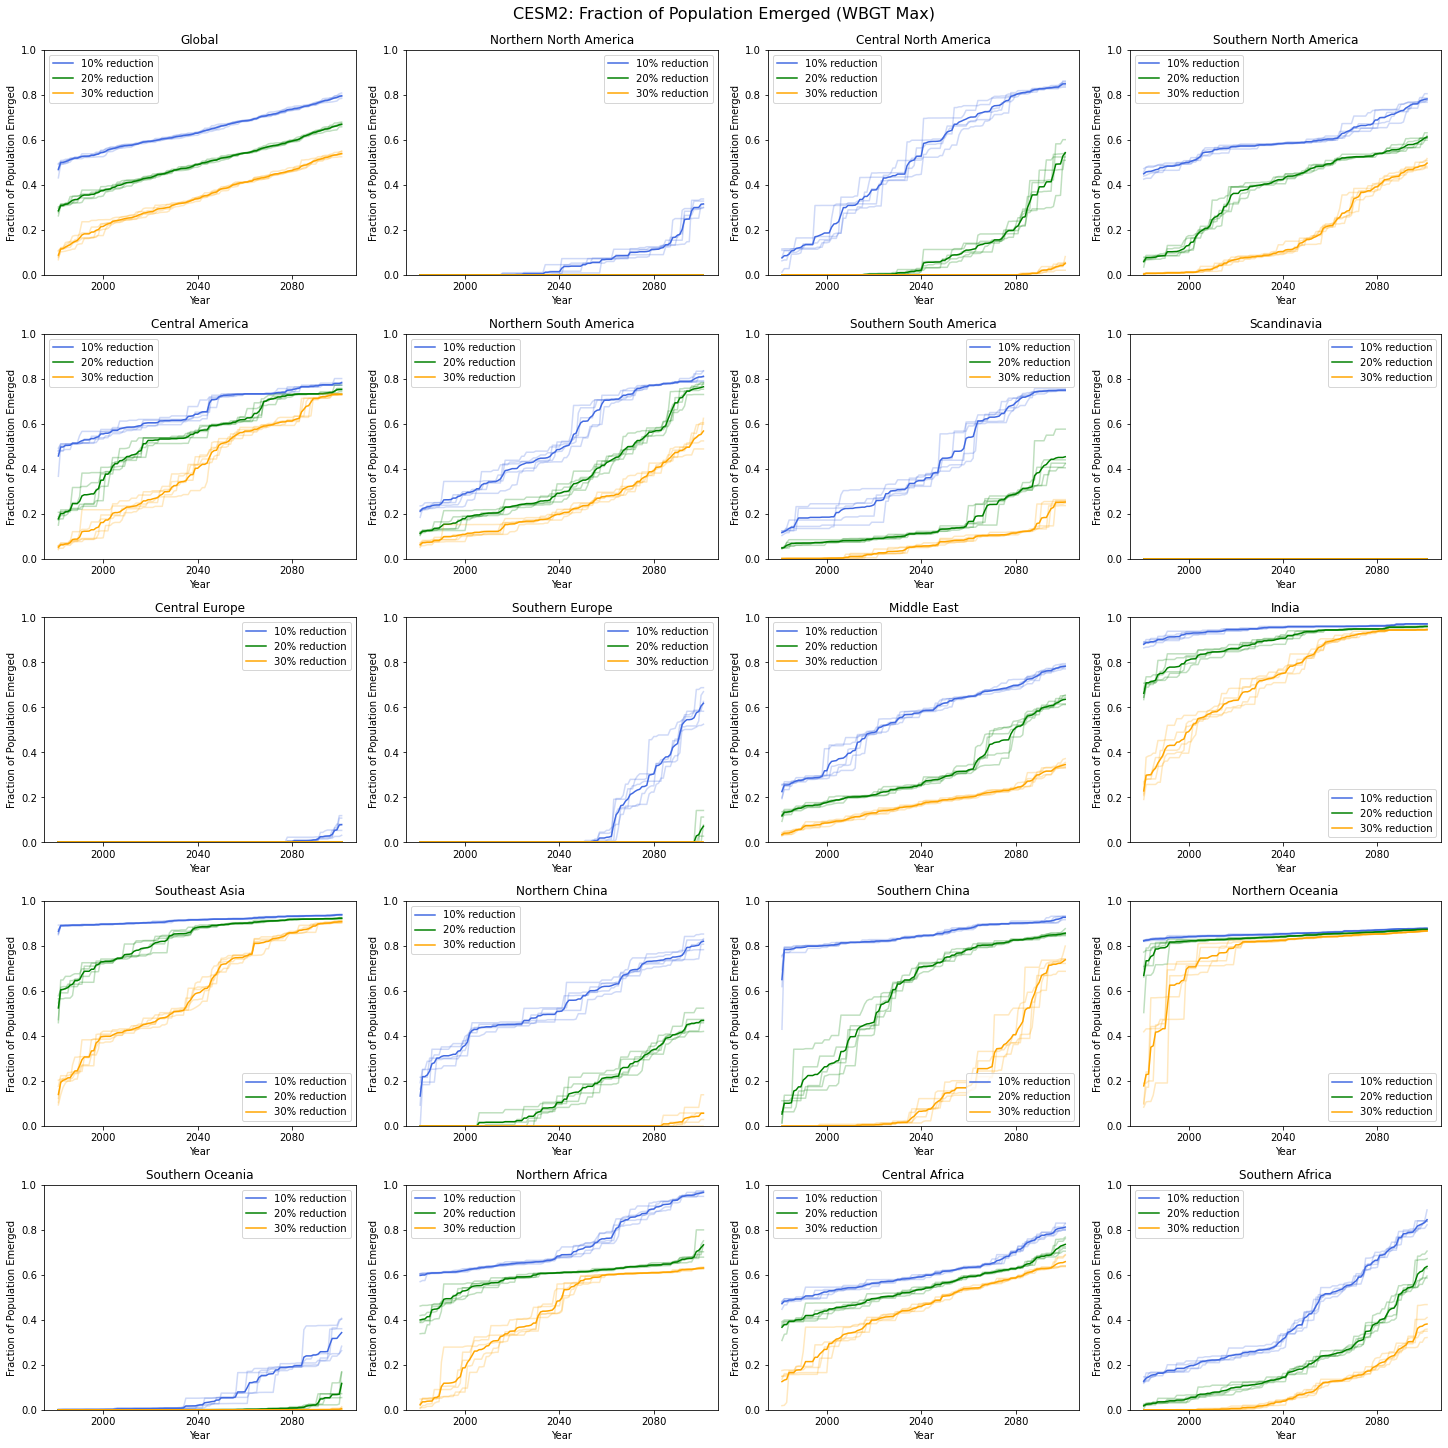

In [130]:
regions = ['Global','Northern North America','Central North America','Southern North America',
          'Central America','Northern South America','Southern South America',
          'Scandinavia','Central Europe','Southern Europe',
          'Middle East','India','Southeast Asia','Northern China','Southern China',
          'Northern Oceania','Southern Oceania',
          'Northern Africa','Central Africa','Southern Africa']

# Create figure and axes
fig, axs = plt.subplots(figsize=(20,20),nrows=5,ncols=4,constrained_layout=True)

# Running counter to determine axis
index = 0

# Loop through regions
for region in regions:
    # Get correct axis
    ax = axs[int(index/4)][index%4]
    index+=1
    
    # Get data for region
    ds_region = lf.slice_region(ds_max['capacity'],region,'CESM2')
    pop_region = lf.slice_region(ds_pop,region,'CESM2')
    
    lf.area_emerge_plot(ds_region,pop_region,region,'Fraction of Population Emerged',ax,start_year=1980)
    
fig.suptitle('CESM2: Fraction of Population Emerged (WBGT Max)',fontsize=16);
plt.savefig('cesm2_max_frac_pop_emerge.png')